In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from lexical_reflections.utils.device import DEVICE

model = AutoModelForCausalLM.from_pretrained("google/gemma-3-1b-it")
model.to(DEVICE)
model.eval()
tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-it")

In [3]:
from datasets import load_dataset

data_opus_books = load_dataset("Helsinki-NLP/opus_books", "en-ru", split="train").train_test_split(
    train_size=50, shuffle=True, seed=42
)

In [4]:
train_ds = data_opus_books["train"]
test_ds = data_opus_books["test"]

train_df = train_ds.to_pandas()["translation"]
test_df = test_ds.to_pandas()["translation"][:100]

In [8]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, train_df)

Data len:  50


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


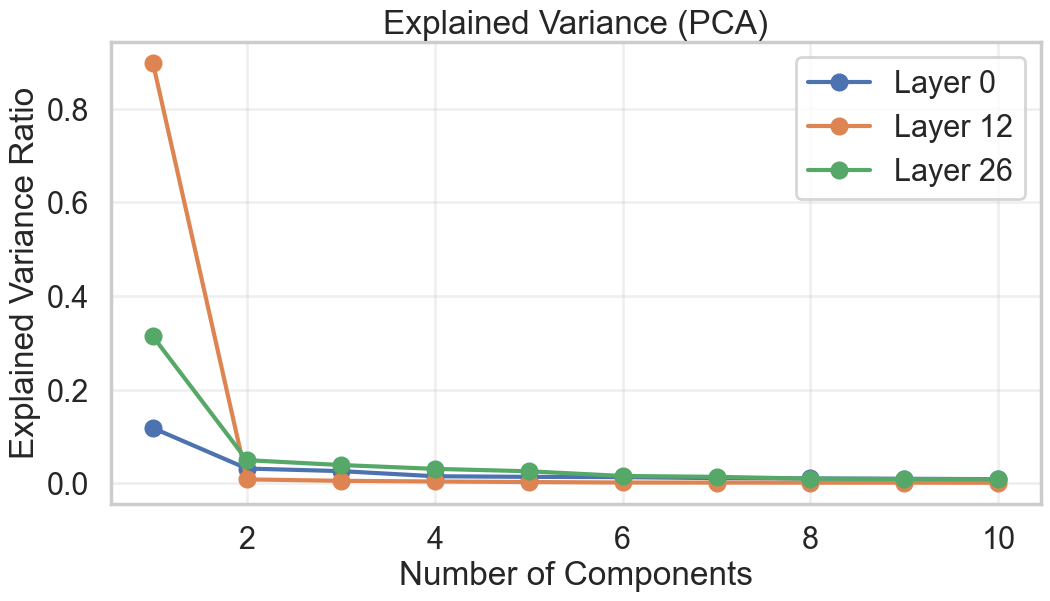

In [9]:
from lexical_reflections.pca.process_hidden_space import extract_pca_components, project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance

pca_components, pca_means, explained_variance_ratios = extract_pca_components(hidden_space_by_language)
projections = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)

Data len:  100


100%|██████████| 100/100 [00:38<00:00,  2.60it/s]


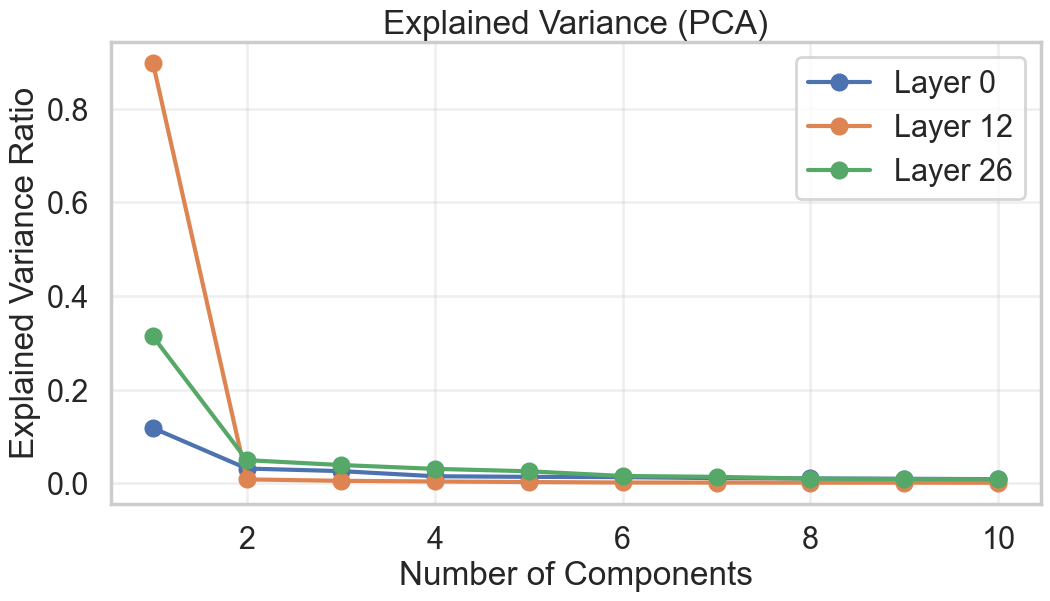

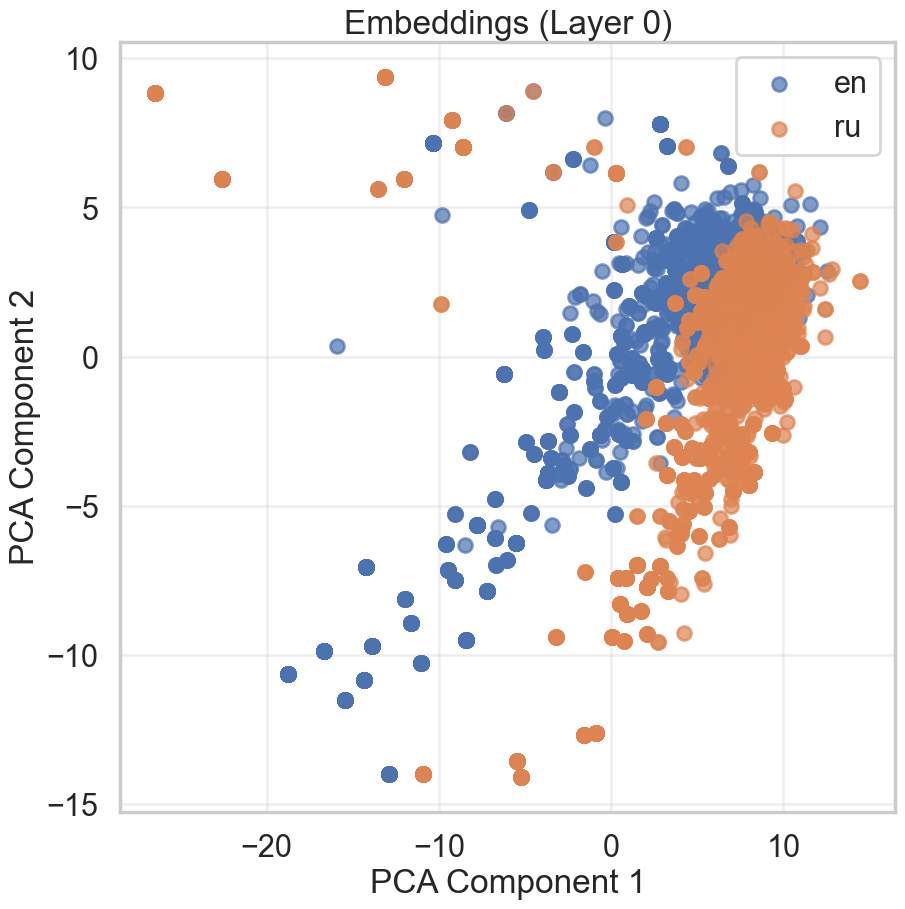

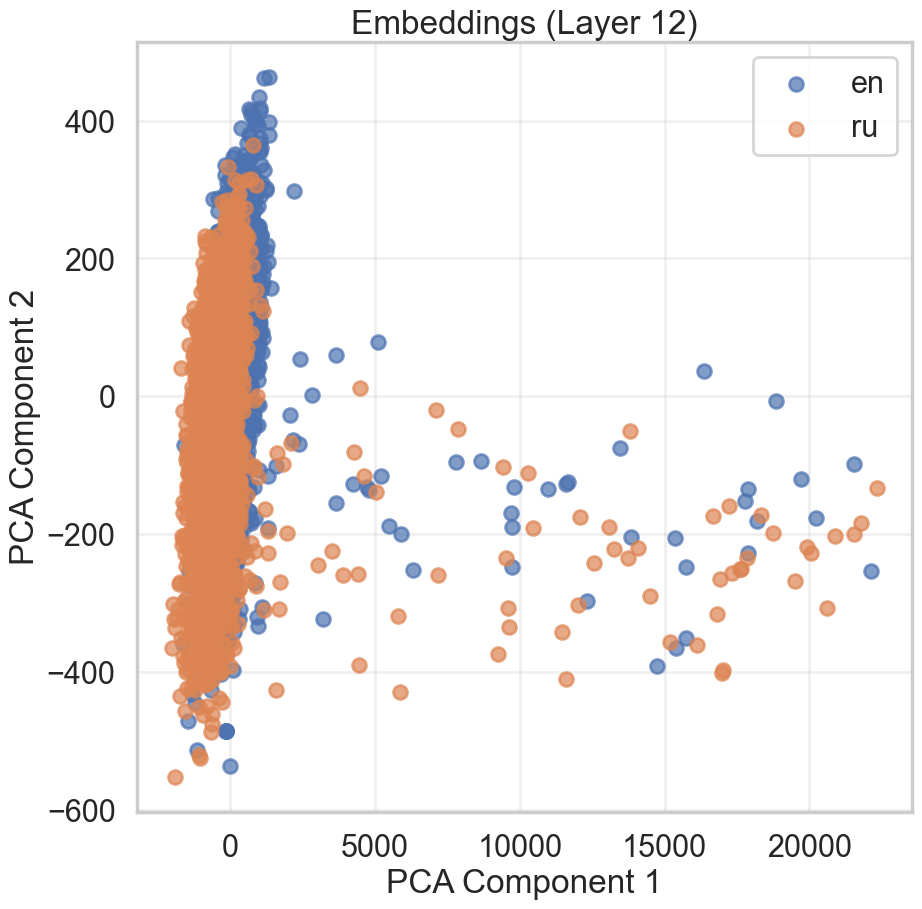

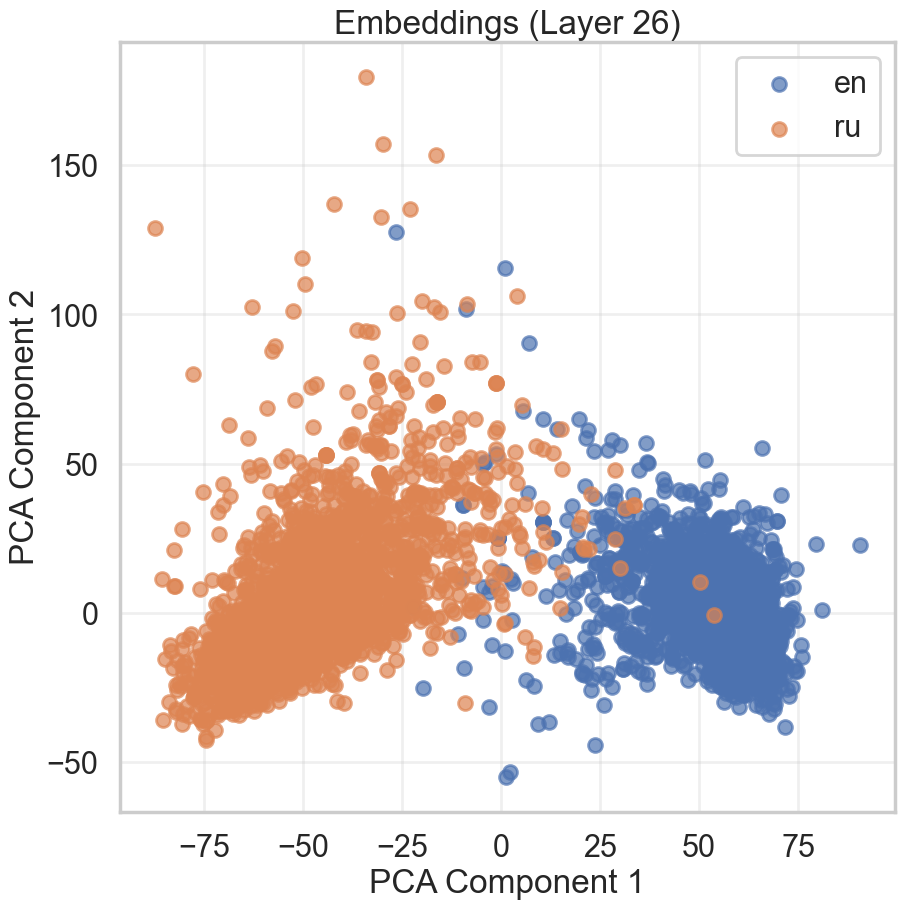

In [10]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language
from lexical_reflections.pca.analyze import project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance, visualize_projections

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, test_df)

projections = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)
visualize_projections(hidden_space_by_language, projections)